**BBRI Stock Marktet Prediction**

Oleh : Rizqi Amaliatus Sholihati 

Data Source = https://finance.yahoo.com/quote/BBRI.JK 
Date : 1 Januari 2015 Sampai dengan 18 Nopember 2020

In [1]:
#Download data selesai dengan nama file BBRI.csv
#import library

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.


In [2]:
#load data

bbri = pd.read_csv("BBRI.csv")
bbri

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,2305.0,2345.0,2305.0,2330.0,1349.378296,45155000
1,2015-01-05,2320.0,2340.0,2315.0,2320.0,1343.587036,49569000
2,2015-01-06,2310.0,2325.0,2300.0,2305.0,1334.900146,65091500
3,2015-01-07,2320.0,2355.0,2315.0,2355.0,1363.856812,146164500
4,2015-01-08,2360.0,2395.0,2360.0,2395.0,1387.022095,146663500
...,...,...,...,...,...,...,...
1473,2020-11-11,3970.0,4190.0,3950.0,4120.0,4120.000000,357098000
1474,2020-11-12,4100.0,4100.0,3920.0,3950.0,3950.000000,333297500
1475,2020-11-13,3970.0,4080.0,3960.0,4000.0,4000.000000,237374000
1476,2020-11-16,4050.0,4070.0,3930.0,3960.0,3960.000000,193022100


In [3]:
#Explorasi Data 
bbri.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1.478000e+03
mean,3048.328823,3082.215832,3013.294993,3047.564276,2660.447347,1.268979e+08
std,758.225118,761.438621,750.605940,756.500550,962.127882,8.489903e+07
min,1610.000000,1675.000000,1595.000000,1660.000000,1082.984497,0.000000e+00
25%,2360.000000,2390.000000,2345.000000,2360.000000,1699.502563,7.774500e+07
50%,3000.000000,3040.000000,2975.000000,3007.500000,2762.269531,1.084202e+08
75%,3660.000000,3680.000000,3620.000000,3660.000000,3392.357178,1.545969e+08
max,4730.000000,4760.000000,4690.000000,4740.000000,4562.036133,8.726073e+08


In [4]:
bbri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1478 entries, 0 to 1477
Data columns (total 7 columns):
Date         1478 non-null object
Open         1478 non-null float64
High         1478 non-null float64
Low          1478 non-null float64
Close        1478 non-null float64
Adj Close    1478 non-null float64
Volume       1478 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 81.0+ KB


In [5]:
bbri.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [6]:
bbri.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

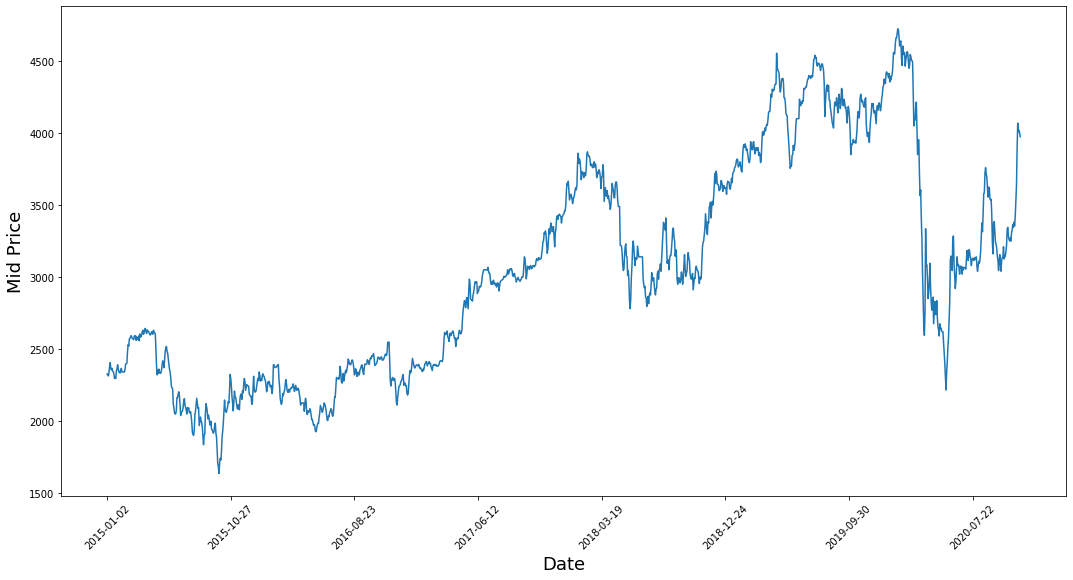

In [7]:
plt.figure(figsize = (18,9))
plt.plot(range(bbri.shape[0]),(bbri['Low']+bbri['High'])/2.0)
plt.xticks(range(0,bbri.shape[0],200),bbri['Date'].loc[::200],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

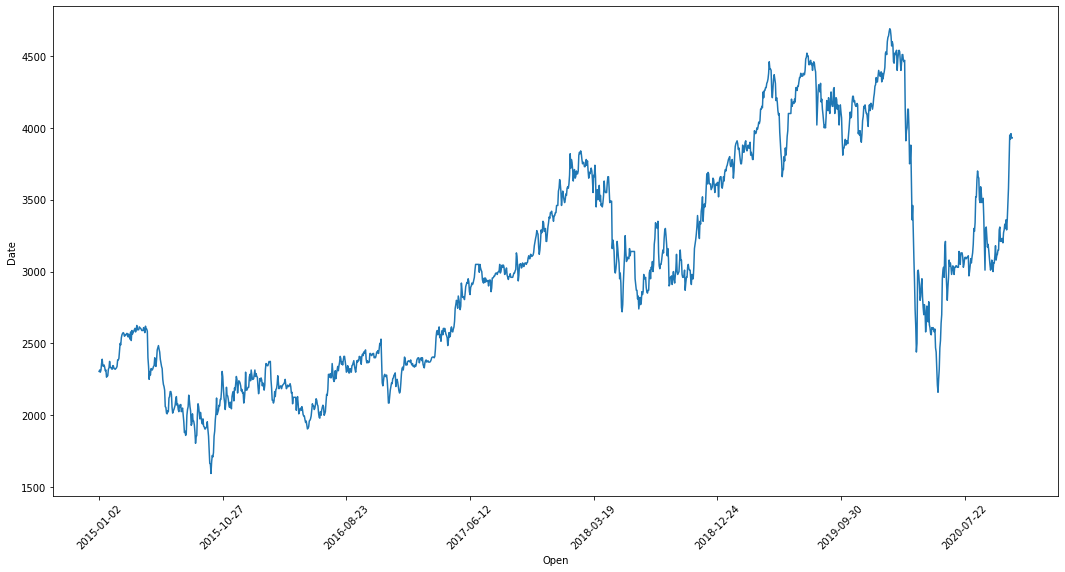

In [8]:
plt.figure(figsize=(18,9))
plt.plot(range(bbri.shape[0]), bbri['Low'])
plt.xticks(range(0,bbri.shape[0],200), bbri['Date'].loc[::200],rotation=45)
plt.ylabel('Date')
plt.xlabel('Open')
plt.show()

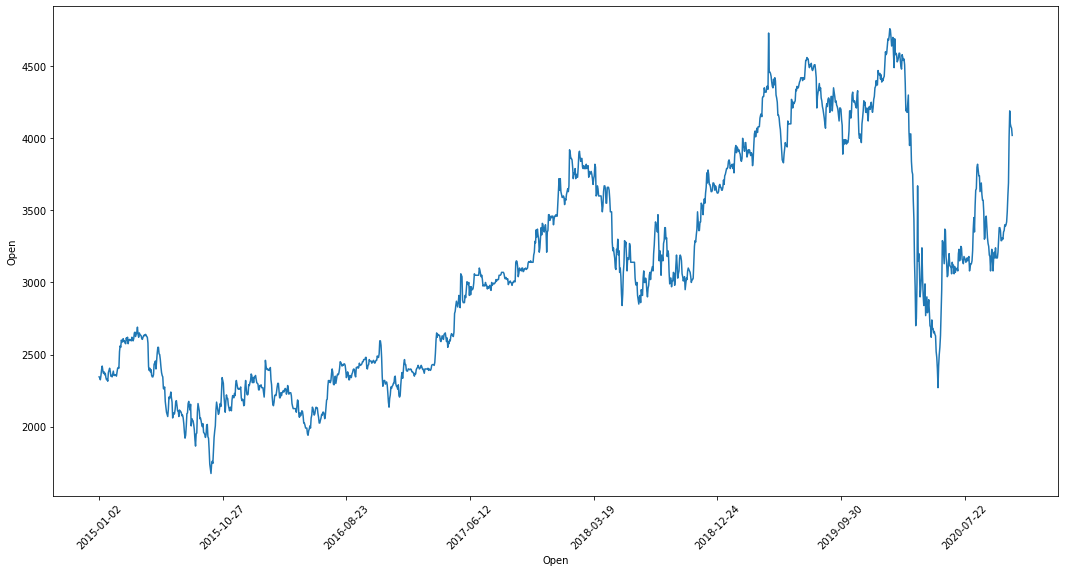

In [9]:
plt.figure(figsize=(18,9))
plt.plot(range(bbri.shape[0]), bbri['High'])
plt.xticks(range(0,bbri.shape[0],200), bbri['Date'].loc[::200],rotation=45)
plt.ylabel('Open')
plt.xlabel('Open')
plt.show()

In [10]:
data = bbri.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(bbri)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [11]:
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [12]:
dataset = new_data.values

In [13]:
train = dataset[0:987,:]
valid = dataset[987:,:]

In [14]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [15]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
 - 19s - loss: 0.0028
Epoch 2/50
 - 17s - loss: 0.0012
Epoch 3/50
 - 17s - loss: 9.3935e-04
Epoch 4/50
 - 17s - loss: 7.0875e-04
Epoch 5/50
 - 17s - loss: 5.9369e-04
Epoch 6/50
 - 17s - loss: 5.0555e-04
Epoch 7/50
 - 17s - loss: 4.6154e-04
Epoch 8/50
 - 17s - loss: 5.0712e-04
Epoch 9/50
 - 17s - loss: 4.4573e-04
Epoch 10/50
 - 17s - loss: 4.2305e-04
Epoch 11/50
 - 17s - loss: 4.2909e-04
Epoch 12/50
 - 17s - loss: 3.9551e-04
Epoch 13/50
 - 17s - loss: 4.6824e-04
Epoch 14/50
 - 17s - loss: 4.2664e-04
Epoch 15/50
 - 18s - loss: 4.0265e-04
Epoch 16/50
 - 19s - loss: 3.9955e-04
Epoch 17/50
 - 18s - loss: 4.3132e-04
Epoch 18/50
 - 17s - loss: 3.9684e-04
Epoch 19/50
 - 17s - loss: 3.9460e-04
Epoch 20/50
 - 17s - loss: 3.9430e-04
Epoch 21/50
 - 18s - loss: 4.0289e-04
Epoch 22/50
 - 17s - loss: 3.9531e-04
Epoch 23/50
 - 17s - loss: 3.7399e-04
Epoch 24/50
 - 17s - loss: 3.6987e-04
Epoch 25/50
 - 17s - loss: 3.8216e-04
Epoch 26/50
 - 17s - loss: 3.6355e-04
Epoch 27/50
 - 17s - loss: 3.

In [16]:
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [17]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

101.21187415822575

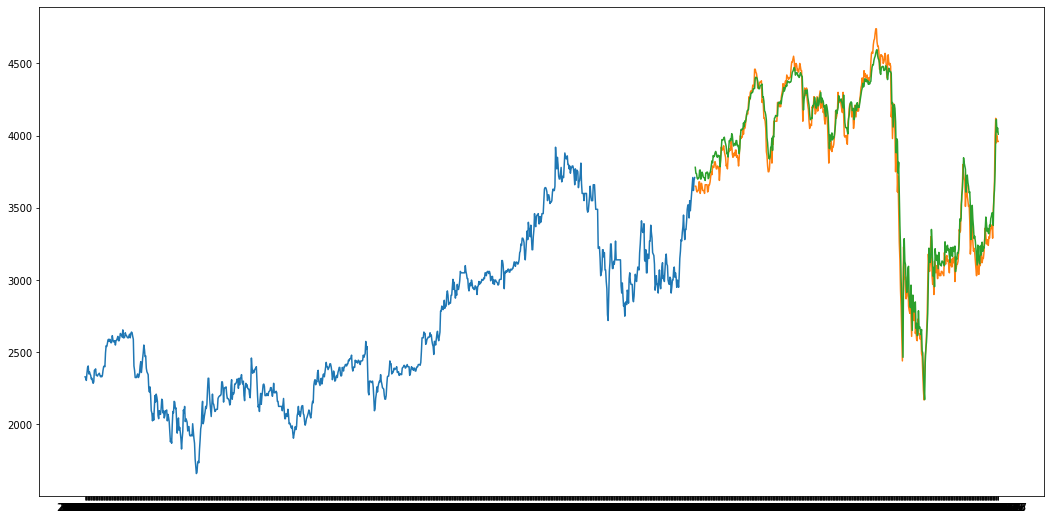

In [21]:
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.figure(figsize = (18,9))
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])